In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## mAP 50 

In [29]:
csv_path = "./runs/stats/flower_dataset_stats.csv"
metric = "map50_mean"
std_col = "map50_95_std"
top_k = 25

In [30]:
df = pd.read_csv(csv_path, sep=",")

In [31]:
df

,model,dataset_name,precision_mean,recall_mean,f1_mean,map50_mean,map50_95_mean,map50_95_std,instances_total,images_total,n_runs
0,yolo11l,dataset_database_active_learning,0.788675,0.935308,0.855108,0.946022,0.625415,0.023812,6576,1359,6
1,yolo11l,dataset_database_active_learning_bg1,0.771520,0.947168,0.848182,0.951212,0.631438,0.020995,6576,1359,6
2,yolo11l,dataset_database_active_learning_bg5,0.816662,0.938710,0.872810,0.955660,0.624722,0.015971,6576,1359,6
3,yolo11l,dataset_database_only_flowers,0.906893,0.889118,0.897763,0.953553,0.644515,0.017827,6573,1362,6
4,yolo11l,dataset_database_only_flowers_bg1,0.887033,0.877648,0.882137,0.944602,0.612802,0.029333,6573,1362,6
...,...,...,...,...,...,...,...,...,...,...,...
67,yolov8s,dataset_database_active_learning_bg1,0.814887,0.943728,0.873417,0.953498,0.635220,0.017009,6576,1359,6
68,yolov8s,dataset_database_active_learning_bg5,0.776287,0.947903,0.851418,0.954712,0.628428,0.017385,6576,1359,6
69,yolov8s,dataset_database_only_flowers,0.891553,0.906348,0.898830,0.944442,0.624792,0.016396,6573,1362,6
70,yolov8s,dataset_database_only_flowers_bg1,0.899072,0.901575,0.899985,0.952652,0.631568,0.018276,6573,1362,6


In [32]:
# ===== TRI =====
df = df.sort_values(metric, ascending=False)

# ===== NORMALISATION MIN-MAX =====
min_val = df[metric].min()
max_val = df[metric].max()

df["metric_norm"] = (df[metric] - min_val) / (max_val - min_val)

# adapter les écarts-types à la normalisation
df["std_norm"] = df[std_col] / (max_val - min_val)
df["mod+dataset"] = df["model"]+"_"+df["dataset_name"]

In [33]:
mean_val = df[metric].mean()
std_val = df[metric].std()

df["metric_zscore"] = (df[metric] - mean_val) / std_val
df["std_zscore"] = df[std_col] / std_val

In [34]:
df_top = df.head(top_k).copy()

In [35]:
values = df_top["metric_zscore"].values
stds = df_top["std_zscore"].values

lower_err = np.zeros_like(stds)
upper_err = stds

yerr = [lower_err, upper_err]

In [36]:
yerr

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.50599004, 0.55110411, 0.30959875, 0.67455467, 0.58884291,
        0.70036507, 0.75597073, 0.77096992, 0.7623678 , 0.45512331,
        0.78172726, 0.74586121, 0.67535023, 0.80145176, 0.77404521,
        0.20726022, 1.00339226, 0.92066612, 0.58169603, 0.40544136,
        0.65092149, 0.82250398, 0.66709718, 0.52535354, 1.12563316])]

In [37]:
df

,model,dataset_name,precision_mean,recall_mean,f1_mean,map50_mean,map50_95_mean,map50_95_std,instances_total,images_total,n_runs,metric_norm,std_norm,mod+dataset,metric_zscore,std_zscore
25,yolo26l,dataset_database_active_learning_bg1,0.835573,0.938378,0.883637,0.958588,0.641235,0.011539,6576,1359,6,1.000000,0.070568,yolo26l_dataset_database_active_learning_bg1,0.823405,0.505990
42,yolo26s,dataset_database_active_learning,0.807563,0.938610,0.866598,0.957555,0.648873,0.012567,6576,1359,6,0.993680,0.076859,yolo26s_dataset_database_active_learning,0.778092,0.551104
43,yolo26s,dataset_database_active_learning_bg1,0.823383,0.921797,0.867810,0.957013,0.645505,0.007060,6576,1359,6,0.990368,0.043178,yolo26s_dataset_database_active_learning_bg1,0.754338,0.309599
66,yolov8s,dataset_database_active_learning,0.832300,0.942020,0.882855,0.956545,0.642003,0.015383,6576,1359,6,0.987503,0.094076,yolov8s_dataset_database_active_learning,0.733801,0.674555
46,yolo26s,dataset_database_only_flowers_bg1,0.900807,0.881840,0.891138,0.956490,0.644680,0.013428,6573,1362,6,0.987167,0.082123,yolo26s_dataset_database_only_flowers_bg1,0.731389,0.588843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,yolo26n,dataset_database_only_flowers_bg5,0.849705,0.831692,0.840402,0.912735,0.564973,0.020893,6573,1362,6,0.719571,0.127778,yolo26n_dataset_database_only_flowers_bg5,-1.187349,0.916209
32,yolo26m,dataset_database_active_learning_bg5,0.776415,0.862405,0.810785,0.888877,0.550142,0.078057,6576,1359,6,0.573659,0.477380,yolo26m_dataset_database_active_learning_bg5,-2.233582,3.422956
59,yolov8m,dataset_database_only_flowers_bg5,0.850870,0.850045,0.847732,0.887747,0.569447,0.095931,6573,1362,6,0.566749,0.586690,yolov8m_dataset_database_only_flowers_bg5,-2.283134,4.206741
26,yolo26l,dataset_database_active_learning_bg5,0.830803,0.837200,0.831078,0.887080,0.568335,0.106237,6576,1359,6,0.562671,0.649719,yolo26l_dataset_database_active_learning_bg5,-2.312369,4.658671


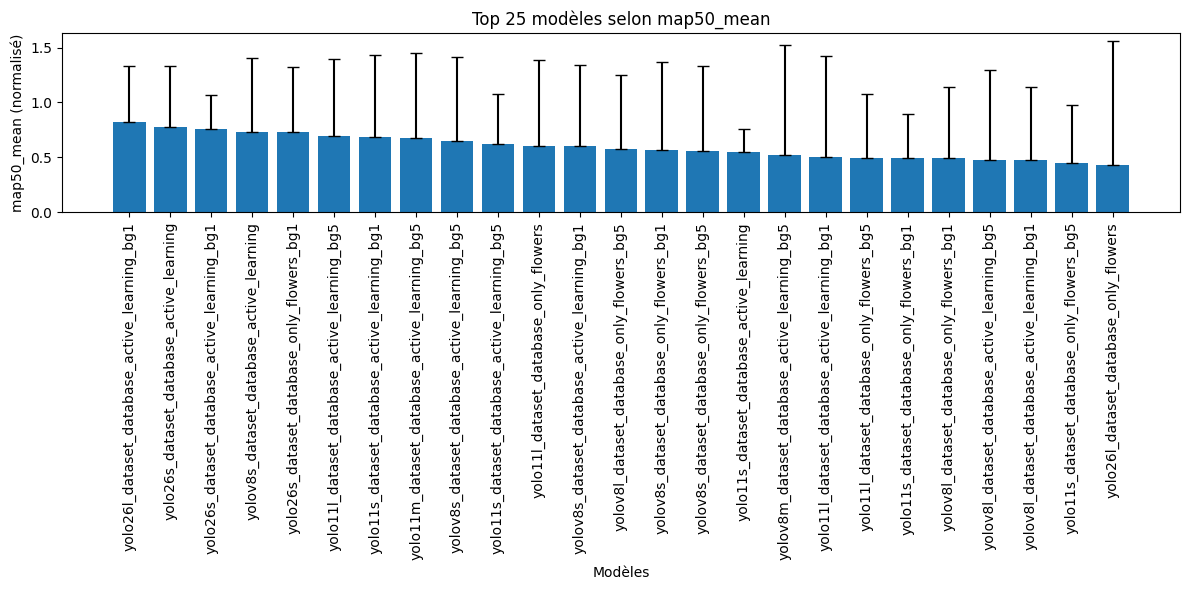

In [27]:
# ===== PLOT =====
plt.figure(figsize=(12,6))

plt.bar(
    df_top["mod+dataset"],
    df_top["metric_zscore"],
    yerr=yerr,
    capsize=4
)

plt.ylabel(f"{metric} (normalisé)")
plt.xlabel("Modèles")
plt.title(f"Top {top_k} modèles selon {metric}")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
import re

def format_label(name):
    parts = name.split("_")

    # -------- Modèle + taille --------
    raw_model = parts[0]

    size_map = {
        "l": "large",
        "m": "medium",
        "s": "small",
        "n": "nano"
    }

    if raw_model[-1] in size_map:
        model = raw_model[:-1]
        size = size_map[raw_model[-1]]
        model_label = f"{model} {size}"
    else:
        model_label = raw_model

    # -------- Mode --------
    mode = "active_learning" if "active" in parts else None

    # -------- Background --------
    bg_part = next((p for p in parts if p.startswith("bg")), None)

    if bg_part:
        match = re.search(r"\d+", bg_part)
        bg = f"boite(s) sol: {match.group()}" if match else "boite(s) sol"
    else:
        bg = None

    # -------- Construction finale --------
    extras = [x for x in [mode, bg] if x]

    if extras:
        return f"{model_label} : " + " + ".join(extras)
    else:
        return model_label



In [85]:
labels = [format_label(x) for x in df_top["mod+dataset"]]
indices = range(1, len(labels) + 1)

In [86]:
import math

def format_legend_columns(indices, labels, ncol=3, padding=4):
    items = [f"{i}: {lab}" for i, lab in zip(indices, labels)]
    rows = math.ceil(len(items) / ncol)

    # découpe en colonnes verticales
    cols = [items[i*rows:(i+1)*rows] for i in range(ncol)]

    # compléter les colonnes plus courtes
    for col in cols:
        while len(col) < rows:
            col.append("")

    # largeur max de chaque colonne
    col_widths = [
        max(len(item) for item in col)
        for col in cols
    ]

    # construire ligne par ligne
    lines = []
    for r in range(rows):
        line_parts = []
        for c in range(ncol):
            line_parts.append(cols[c][r].ljust(col_widths[c] + padding))
        lines.append("".join(line_parts))

    return "\n".join(lines)

Text(0.01, -0.2, '1: yolo26 large : active_learning + boite(s) sol: 1     10: yolo11 small : active_learning + boite(s) sol: 5     19: yolo11 large : boite(s) sol: 5                      \n2: yolo26 small : active_learning                       11: yolo11 large                                         20: yolo11 small : boite(s) sol: 1                      \n3: yolo26 small : active_learning + boite(s) sol: 1     12: yolov8 small : active_learning + boite(s) sol: 1     21: yolov8 large : boite(s) sol: 1                      \n4: yolov8 small : active_learning                       13: yolov8 large : boite(s) sol: 5                       22: yolov8 large : active_learning + boite(s) sol: 5    \n5: yolo26 small : boite(s) sol: 1                       14: yolov8 small : boite(s) sol: 1                       23: yolov8 large : active_learning + boite(s) sol: 1    \n6: yolo11 large : active_learning + boite(s) sol: 5     15: yolov8 small : boite(s) sol: 5                       24: yolo11 sma

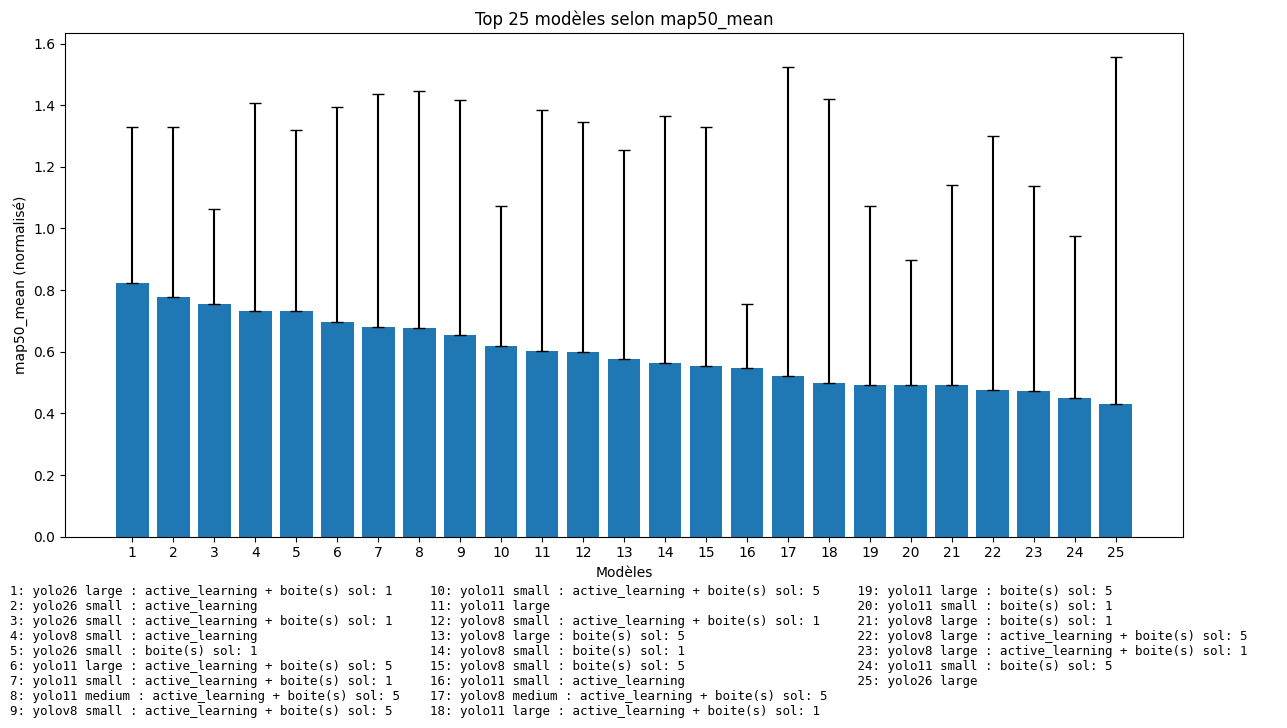

In [87]:
plt.figure(figsize=(12,6))

plt.bar(
    indices,
    df_top["metric_zscore"],
    yerr=yerr,
    capsize=4
)

plt.ylabel(f"{metric} (normalisé)")
plt.xlabel("Modèles")
plt.title(f"Top {top_k} modèles selon {metric}")
plt.xticks(indices)

plt.tight_layout()
legend_text = "\n".join(
    [f"{i} : {label}" for i, label in zip(indices, labels)]
)

legend_text = format_legend_columns(indices, labels, ncol=3)

plt.figtext(
    0.01,
    -0.20,
    legend_text,
    ha="left",
    fontsize=9,
    family="monospace"
)

## mAP 50-95

In [102]:
metric = "map50_95_mean"
std_col = "map50_95_std"
top_k = 25

In [103]:
# ===== TRI =====
df = df.sort_values(metric, ascending=False)

# ===== NORMALISATION MIN-MAX =====
min_val = df[metric].min()
max_val = df[metric].max()

df["metric_norm"] = (df[metric] - min_val) / (max_val - min_val)

# adapter les écarts-types à la normalisation
df["std_norm"] = df[std_col] / (max_val - min_val)
df["mod+dataset"] = df["model"] +"_"+ df["dataset_name"]

In [104]:
mean_val = df[metric].mean()
std_val = df[metric].std()

df["metric_zscore"] = (df[metric] - mean_val) / std_val
df["std_zscore"] = df[std_col] / std_val

In [105]:
df_top = df.head(top_k).copy()

In [106]:
values = df_top["metric_zscore"].values
stds = df_top["std_zscore"].values

lower_err = np.zeros_like(stds)
upper_err = stds

yerr = [lower_err, upper_err]

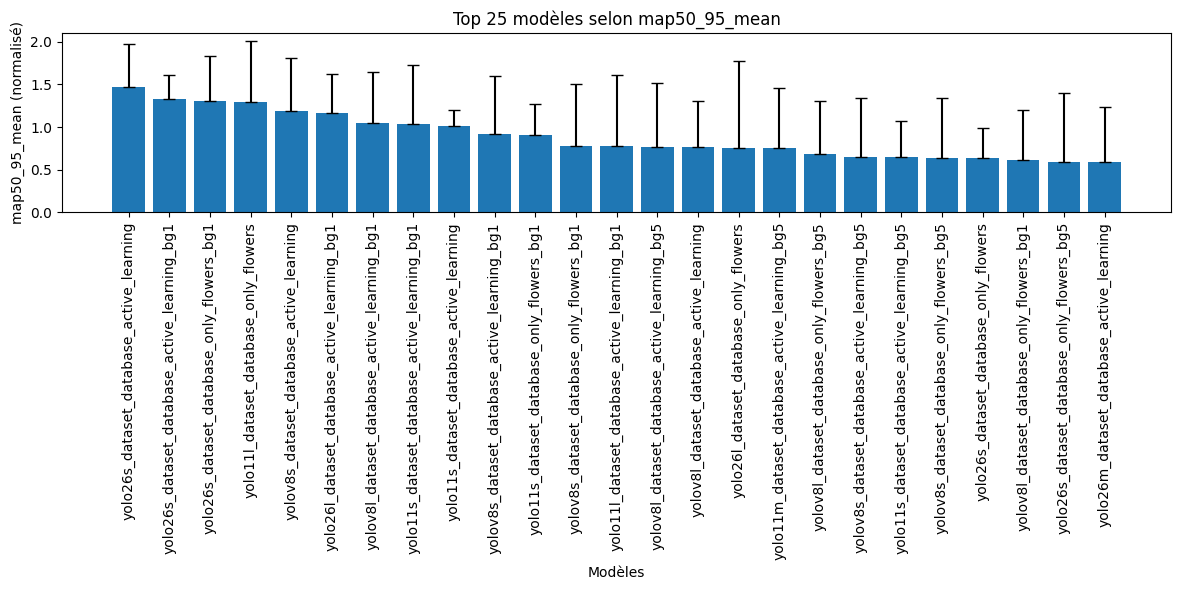

In [107]:
# ===== PLOT =====
plt.figure(figsize=(12,6))

plt.bar(
    df_top["mod+dataset"],
    df_top["metric_zscore"],
    yerr=yerr,
    capsize=4
)

plt.ylabel(f"{metric} (normalisé)")
plt.xlabel("Modèles")
plt.title(f"Top {top_k} modèles selon {metric}")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [108]:
import re

def format_label(name):
    parts = name.split("_")

    # -------- Modèle + taille --------
    raw_model = parts[0]

    size_map = {
        "l": "large",
        "m": "medium",
        "s": "small",
        "n": "nano"
    }

    if raw_model[-1] in size_map:
        model = raw_model[:-1]
        size = size_map[raw_model[-1]]
        model_label = f"{model} {size}"
    else:
        model_label = raw_model

    # -------- Mode --------
    mode = "active_learning" if "active" in parts else None

    # -------- Background --------
    bg_part = next((p for p in parts if p.startswith("bg")), None)

    if bg_part:
        match = re.search(r"\d+", bg_part)
        bg = f"boite(s) sol: {match.group()}" if match else "boite(s) sol"
    else:
        bg = None

    # -------- Construction finale --------
    extras = [x for x in [mode, bg] if x]

    if extras:
        return f"{model_label} : " + " + ".join(extras)
    else:
        return model_label



In [109]:
labels = [format_label(x) for x in df_top["mod+dataset"]]
indices = range(1, len(labels) + 1)

In [110]:
import math

def format_legend_columns(indices, labels, ncol=3, padding=4):
    items = [f"{i}: {lab}" for i, lab in zip(indices, labels)]
    rows = math.ceil(len(items) / ncol)

    # découpe en colonnes verticales
    cols = [items[i*rows:(i+1)*rows] for i in range(ncol)]

    # compléter les colonnes plus courtes
    for col in cols:
        while len(col) < rows:
            col.append("")

    # largeur max de chaque colonne
    col_widths = [
        max(len(item) for item in col)
        for col in cols
    ]

    # construire ligne par ligne
    lines = []
    for r in range(rows):
        line_parts = []
        for c in range(ncol):
            line_parts.append(cols[c][r].ljust(col_widths[c] + padding))
        lines.append("".join(line_parts))

    return "\n".join(lines)

Text(0.01, -0.2, '1: yolo26 small : active_learning                      10: yolov8 small : active_learning + boite(s) sol: 1     19: yolov8 small : active_learning + boite(s) sol: 5    \n2: yolo26 small : active_learning + boite(s) sol: 1    11: yolo11 small : boite(s) sol: 1                       20: yolo11 small : active_learning + boite(s) sol: 5    \n3: yolo26 small : boite(s) sol: 1                      12: yolov8 small : boite(s) sol: 1                       21: yolov8 small : boite(s) sol: 5                      \n4: yolo11 large                                        13: yolo11 large : active_learning + boite(s) sol: 1     22: yolo26 small                                        \n5: yolov8 small : active_learning                      14: yolov8 large : active_learning + boite(s) sol: 5     23: yolov8 large : boite(s) sol: 1                      \n6: yolo26 large : active_learning + boite(s) sol: 1    15: yolov8 large : active_learning                       24: yolo26 small : b

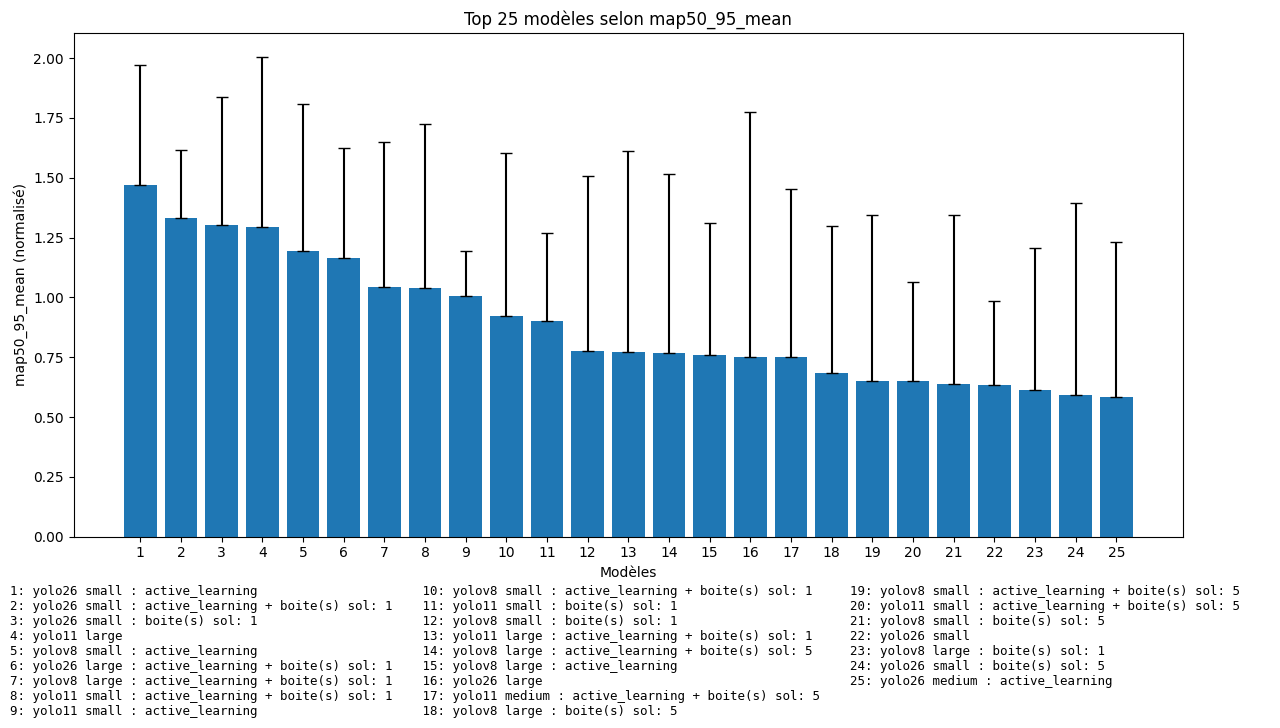

In [111]:
plt.figure(figsize=(12,6))

plt.bar(
    indices,
    df_top["metric_zscore"],
    yerr=yerr,
    capsize=4
)

plt.ylabel(f"{metric} (normalisé)")
plt.xlabel("Modèles")
plt.title(f"Top {top_k} modèles selon {metric}")
plt.xticks(indices)

plt.tight_layout()
legend_text = "\n".join(
    [f"{i} : {label}" for i, label in zip(indices, labels)]
)

legend_text = format_legend_columns(indices, labels, ncol=3)

plt.figtext(
    0.01,
    -0.20,
    legend_text,
    ha="left",
    fontsize=9,
    family="monospace"
)